In [38]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymongo import MongoClient
import seaborn as sns

In [8]:
# Get Area codes of interest
columns = ["area_code", "area_name", "latitude", "longitude"]
regions = pd.read_csv("regions.txt", names=columns)
regions

,area_code,area_name,latitude,longitude
0,E12000001,NORTH EAST,55.0,-1.9
1,E12000002,NORTH WEST,54.0,-2.6
2,E12000003,YORKSHIRE AND THE HUMBER,53.6,-1.2
3,E12000004,EAST MIDLANDS,53.0,-0.8
4,E12000005,WEST MIDLANDS,52.5,-2.3
5,E12000006,EAST,52.2,0.4
6,E12000007,LONDON,51.5,-0.1
7,E12000008,SOUTH EAST,51.3,-0.5
8,E12000009,SOUTH WEST,51.0,-3.2
9,W92000004,WALES,51.5,-3.2


In [14]:
centres = np.array(regions[["longitude","latitude"]])

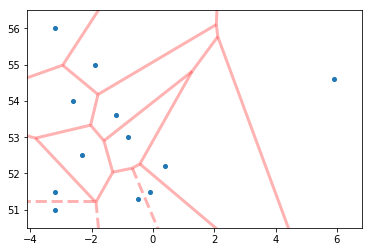

In [27]:
fig = voronoi_plot_2d(Voronoi(centres), show_vertices=False, line_colors='red',
                     line_width=3, line_alpha=0.3, point_size=8)
plt.show()

In [29]:
def query_to_dataframe(query, database):
    '''
    custom function to create a dataframe of query results
    from a mongodb database
    '''
    
    client = MongoClient(host="midgard09", port=27017)
    weather_data = client.pitds_weather_data[database]
    
    entries = []
    for entry in weather_data.find(query):
        entries.append(entry)
      
    if len(entries)==0: # no hits for the query
        return None
    else:
        return pd.DataFrame(entries).drop(columns=["_id"])

# Get station locations
stations = query_to_dataframe({}, database="station_cordinates")

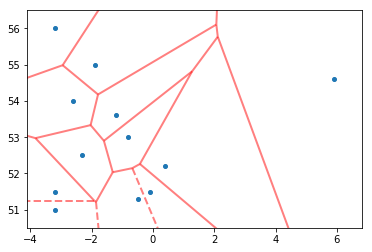

In [83]:
#fig, ax = plt.subplots()
fig = voronoi_plot_2d(Voronoi(centres), show_vertices=False, line_colors='red',
                     line_width=2, line_alpha=0.5, point_size=8)


In [85]:
sns.scatterplot(data=stations, x="longitude", y="latitude", ax=fig.axes[0], marker="+")

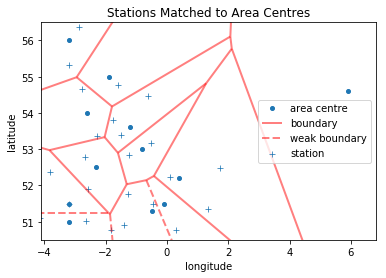

In [97]:
fig.axes[0].set_title("Stations Matched to Area Centres")
fig.axes[0].legend(["area centre","boundary","weak boundary","station"], loc=5)
fig